# Defining the layering of the atmosphere

In this notebook, we want to have a closer look to the Layer class of archNEMESIS. In a forward model or retrieval, we usually define the input atmospheric profiles (e.g., altitude, pressure, temperature, volume mixing ratio, dust abundance, etc.). However, for the radiative transfer calculations we need to define a finite number of layers, with a specified width, pressure and temperature. The Layer class is specifically designed to make this transformation from the initial vertical profiles in our Atmosphere, to the layers at which the radiative transfer calculations are defined. 

Apart from the reference atmospheric profiles, the main inputs we need to define how to split our atmosphere into layers and calculate their properties are:

- *RADIUS*: Reference planetary radius where H=0.  Usually at surface for  terrestrial planets, or at 1 bar pressure level for gas giants.
- *NLAY*: Defines the number of layers we want to include in the atmosphere
- *LAYHT*: Height of the base of the lowest layer (m). Default is 0.
- *LAYANG*: Angle from the zenith at which to split up the layers. Default is 0.
- *LAYTYP*: Integer specifying how to split up the layers. In NEMESIS, it can take up to six values:
    - *LAYTYP=0*: Layers are split by equal changes in pressure.
    - *LAYTYP=1*: Layers are split by equal changes in log pressure.
    - *LAYTYP=2*: Layers are split by equal changes in height.
    - *LAYTYP=3*: Layers are split by equal changes in path length at LAYANG.
    - *LAYTYP=4*: Base pressure of the layers is explicitly specified by *P_base*.
    - *LAYTYP=5*: Base altitude of the layers is explicitly specified by *H_base*.
 - *LAYINT*: Integer specifying how the effective properties of the layer (i.e., temperature and pressure) should be calculated.
     - *LAYINT=0*: Layer properties are taken at the middle of the layer.
     - *LAYINT=1*: Layer properties calculated by performing a weighted average on the layer with the absorber amounts. This option is generally recommended, but *LAYINT=0* might be useful for comparisons.
  
Once the inputs of the Layer class have been defined, we can simply use the main function of the Layer class, Layer.*calc_layering()*, to split the atmosphere into layers and calculate their effective properties. The inputs to this function are the internal parameters of the class, and the reference atmospheric profiles (typically taken from the Atmosphere class).

In [1]:
import archnemesis as ans
import matplotlib.pyplot as plt
import numpy as np

## 1. Splitting the atmosphere into layers

In this notebook we are going to split the atmosphere into different layers using the several methods that are supported by NEMESIS. To do so, we are going to take some reference profiles from the Martian atmosphere and are going to test the different values of *LAYTYP*. The function to split the atmosphere into layers is called Layer.*layer_split()*, but we could also perform these calculations with the more complete Layer.*calc_layering()* function, which does these calculations and also calcualtes the effective properties of the layers.

Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT


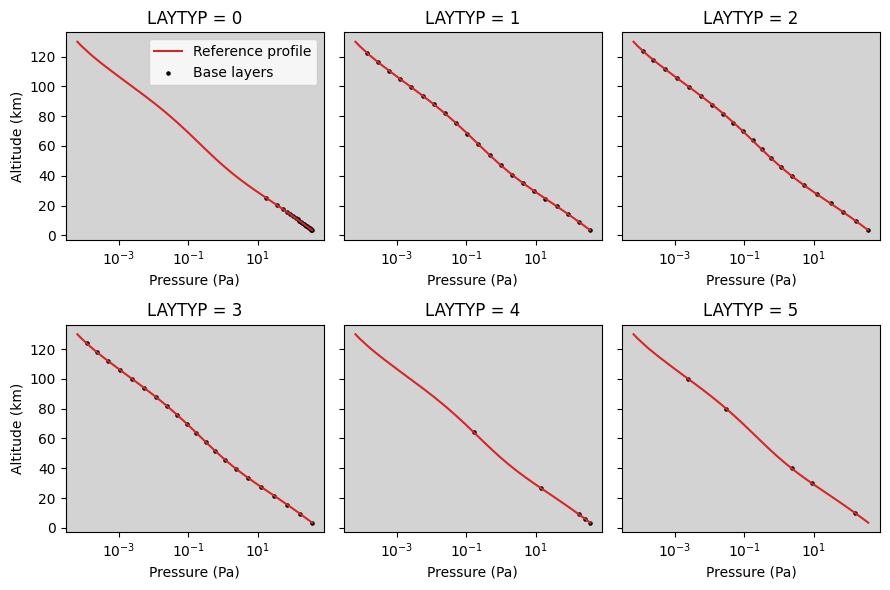

In [2]:
#Reading reference atmospheric profiles
################################################

Atmosphere = ans.Atmosphere_0()
Atmosphere.read_hdf5('mars')

#Defining the inputs for the Layer class
#################################################

Layer = ans.Layer_0()

Layer.RADIUS = Atmosphere.RADIUS #Radius of the planet (m)
Layer.LAYANG = 0.0   #Angle at which to split the layers (typically it is zero)
Layer.NLAY = 21      #Number of atmospheric layers
Layer.LAYHT = 0.0    


#Calculating the layer base heights and pressures for the different methods
##################################################################################

fig,ax = plt.subplots(2,3,figsize=(9,6),sharey=True)
 
#Equal changes in pressure
Layer.LAYTYP = 0
Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[0,Layer.LAYTYP].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red',label='Reference profile')
ax[0,Layer.LAYTYP].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black',label='Base layers')
ax[0,Layer.LAYTYP].set_xscale('log')
ax[0,Layer.LAYTYP].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[0,Layer.LAYTYP].set_facecolor('lightgray')
ax[0,Layer.LAYTYP].set_xlabel('Pressure (Pa)')
ax[0,Layer.LAYTYP].legend()


#Equal changes in log pressure
Layer.LAYTYP = 1
Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[0,Layer.LAYTYP].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red')
ax[0,Layer.LAYTYP].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black')
ax[0,Layer.LAYTYP].set_xscale('log')
ax[0,Layer.LAYTYP].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[0,Layer.LAYTYP].set_facecolor('lightgray')
ax[0,Layer.LAYTYP].set_xlabel('Pressure (Pa)')

#Equal changes in height
Layer.LAYTYP = 2
Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[0,Layer.LAYTYP].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red')
ax[0,Layer.LAYTYP].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black')
ax[0,Layer.LAYTYP].set_xscale('log')
ax[0,Layer.LAYTYP].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[0,Layer.LAYTYP].set_facecolor('lightgray')
ax[0,Layer.LAYTYP].set_xlabel('Pressure (Pa)')


#Equal changes in line-of-sight path intervals
Layer.LAYTYP = 3
Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[1,Layer.LAYTYP-3].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red')
ax[1,Layer.LAYTYP-3].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black')
ax[1,Layer.LAYTYP-3].set_xscale('log')
ax[1,Layer.LAYTYP-3].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[1,Layer.LAYTYP-3].set_facecolor('lightgray')
ax[1,Layer.LAYTYP-3].set_xlabel('Pressure (Pa)')

#Specify base pressures
Layer.LAYTYP = 4
Layer.P_base = np.array([369.233, 263.738, 175.8259, 14.660, 0.16523462])

Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[1,Layer.LAYTYP-3].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red')
ax[1,Layer.LAYTYP-3].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black')
ax[1,Layer.LAYTYP-3].set_xscale('log')
ax[1,Layer.LAYTYP-3].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[1,Layer.LAYTYP-3].set_facecolor('lightgray')
ax[1,Layer.LAYTYP-3].set_xlabel('Pressure (Pa)')


#Specify base altitudes
Layer.LAYTYP = 5
Layer.H_base = np.array([10.,30.,40.,80.,100.])*1.0e3

Layer.layer_split(H=Atmosphere.H, P=Atmosphere.P, T=Atmosphere.T, LAYANG=Layer.LAYANG)

ax[1,Layer.LAYTYP-3].plot(Atmosphere.P,Atmosphere.H/1.0e3,c='tab:red')
ax[1,Layer.LAYTYP-3].scatter(Layer.BASEP,Layer.BASEH/1.0e3,s=5.,c='black')
ax[1,Layer.LAYTYP-3].set_xscale('log')
ax[1,Layer.LAYTYP-3].set_title('LAYTYP = '+str(Layer.LAYTYP))
ax[1,Layer.LAYTYP-3].set_facecolor('lightgray')
ax[1,Layer.LAYTYP-3].set_xlabel('Pressure (Pa)')

ax[0,0].set_ylabel('Altitude (km)')
ax[1,0].set_ylabel('Altitude (km)')

plt.tight_layout()

 


## 2. Calculating the layer effective parameters

Once the atmosphere has been split into layers, we need to compute the effective properties of each layer so that we can perform the radiative transfer calculations. 

Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
Number of layers ::  21
Layers calculated by equal changes in log pressure
Layer properties calculated through mass weighted averages

BASEH(km) BASEP(bar) DELH(km) P(bar) T(K) TOTAM(m-2) DUST_TOTAM(m-2)
3.424995893212529 0.0036923434448242203 5.617526329736964 0.0027521430538672534 145.48803856834152 7.370279835574327e+26 0.0
9.042522222949492 0.0017608174868068511 5.314357101379219 0.0012946058163291346 140.38816201279914 3.406107491795586e+26 0.0
14.35687932432871 0.0008397047209113015 5.374222709226705 0.0006173747370842794 135.2348750151874 1.7048583043463112e+26 0.0
19.731102033555416 0.00040044128571178347 4.859812514045621 0.00029585452488165335 132.0850709320334 7.583586344787569e+25 0.0
24.590914547601038 0.0001909638225309494 5.200575588706277 0.00014134203196270094 132.19185199998446 3.8453260497954553e+25 0.0
29.791490136307313 9.106748683720664e-05 5.415733505395474 6.69982613998211e-05 138.00272704442014 1.81453

/home/stem/ja22256/Documents/Projects/archnemesis-dist/archnemesis/Layer_0.py:531: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[3].set_xscale('log')


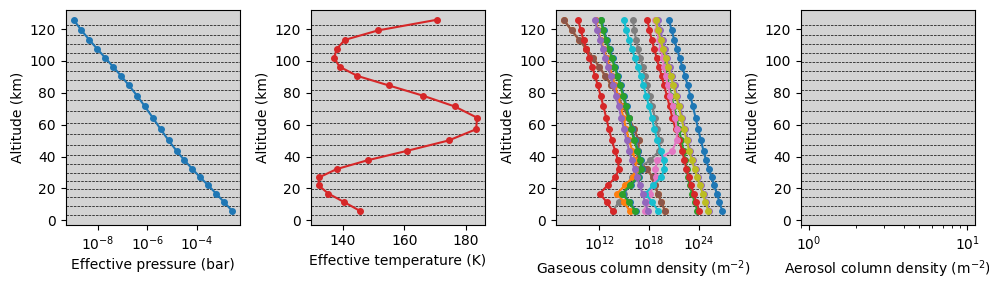

In [4]:
#Splitting the atmosphere into layers and calculating their effective properties
#############################################################################################

Layer.LAYTYP= 1
Layer.NLAY = 21
Layer.calc_layering(H=Atmosphere.H,P=Atmosphere.P,T=Atmosphere.T, ID=Atmosphere.ID,VMR=Atmosphere.VMR, DUST=Atmosphere.DUST)
 
#Printing some useful information
#############################################################################################

#Printing some useful information in the screen
Layer.summary_info()

#Making a summary plot
Layer.plot_Layer()